In [82]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
import yfinance as yf
import math

In [83]:
# Função para criar o dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [84]:
# Função para treinar o modelo LSTM
def train_model(trainX, trainY, look_back, units, epochs, bidirectional=False):
    model = Sequential()
    if bidirectional:
        model.add(Bidirectional(LSTM(units, input_shape=(1, look_back))))
    else:
        model.add(LSTM(units, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
    return model, history

In [85]:
# Função para calcular o MSE e RMSE para o baseline
def calculate_baseline_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return mse, rmse

In [86]:
# Função para implementar a abordagem de amostragem acumulativa
def cumulative_sampling_approach(model, data, look_back, max_samples):
    predictions = []
    for i in range(min(len(data) - look_back, max_samples)):
        sample = data[i:i+look_back]
        sample = np.reshape(sample, (1, 1, look_back))
        prediction = model.predict(sample)
        predictions.append(prediction[0, 0])
    return np.array(predictions)

In [87]:
# Função para implementar a abordagem de janela deslizante
def sliding_window_approach(model, data, look_back, max_samples):
    predictions = []
    for i in range(min(len(data) - look_back, max_samples)):
        sample = data[i:i+look_back]
        sample = np.reshape(sample, (1, 1, look_back))
        prediction = model.predict(sample)
        predictions.append(prediction[0, 0])
        data[i+look_back] = prediction
        model.fit(sample, np.array([[prediction]]), epochs=1, verbose=0)
    return np.array(predictions)

In [90]:
# Ativos para previsão
# Riot Platforms, Inc. (RIOT)
# Alibaba Group Holding Limited (BABA)
# Barrick Gold Corporation (GOLD)
# PayPal Holdings, Inc. (PYPL)
assets = ['RIOT', 'BABA', 'GOLD', 'PYPL']

# Dicionário para armazenar os resultados
results = {}

Processing RIOT
[*********************100%%**********************]  1 of 1 completed


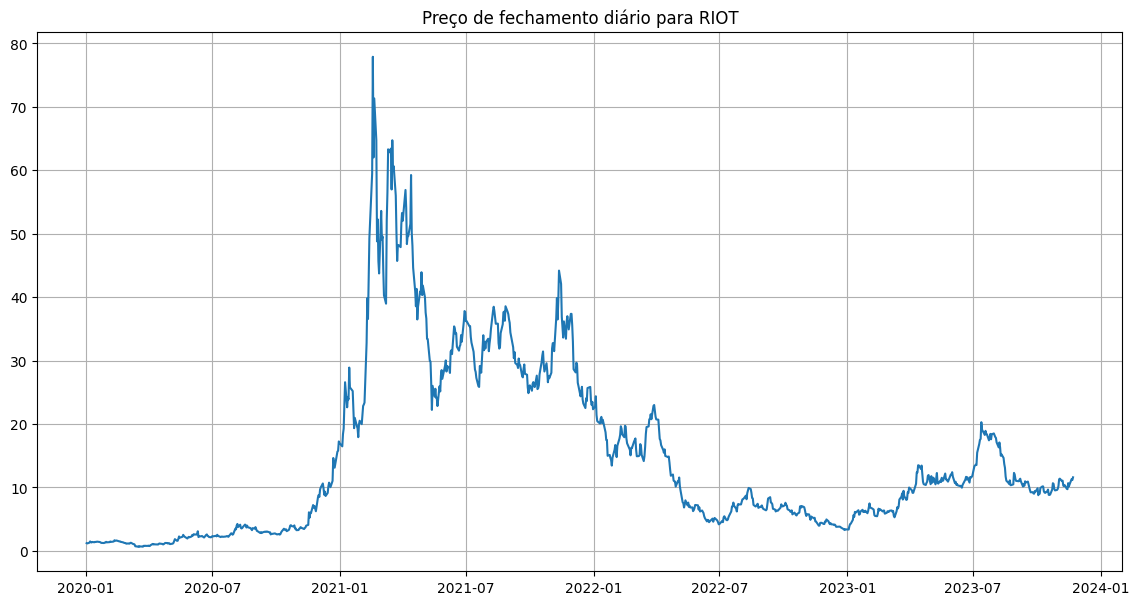

Epoch 1/5
655/655 - 3s - loss: 0.0272 - 3s/epoch - 5ms/step
Epoch 2/5
655/655 - 1s - loss: 0.0072 - 1s/epoch - 2ms/step
Epoch 3/5
655/655 - 1s - loss: 0.0012 - 1s/epoch - 2ms/step
Epoch 4/5
655/655 - 1s - loss: 8.9508e-04 - 1s/epoch - 2ms/step
Epoch 5/5
655/655 - 1s - loss: 8.9383e-04 - 1s/epoch - 2ms/step
Epoch 1/5
655/655 - 6s - loss: 0.0300 - 6s/epoch - 9ms/step
Epoch 2/5
655/655 - 2s - loss: 0.0030 - 2s/epoch - 2ms/step
Epoch 3/5
655/655 - 2s - loss: 9.0970e-04 - 2s/epoch - 3ms/step
Epoch 4/5
655/655 - 2s - loss: 8.9646e-04 - 2s/epoch - 2ms/step
Epoch 5/5
655/655 - 2s - loss: 9.3666e-04 - 2s/epoch - 3ms/step


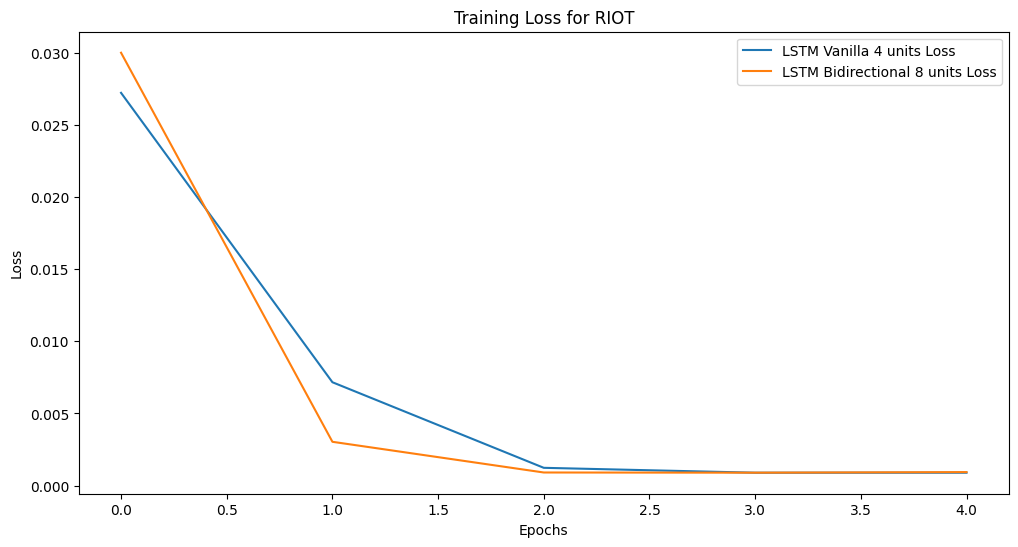

1/1 [==============================] - 0s 24ms/step
Processing BABA
[*********************100%%**********************]  1 of 1 completed


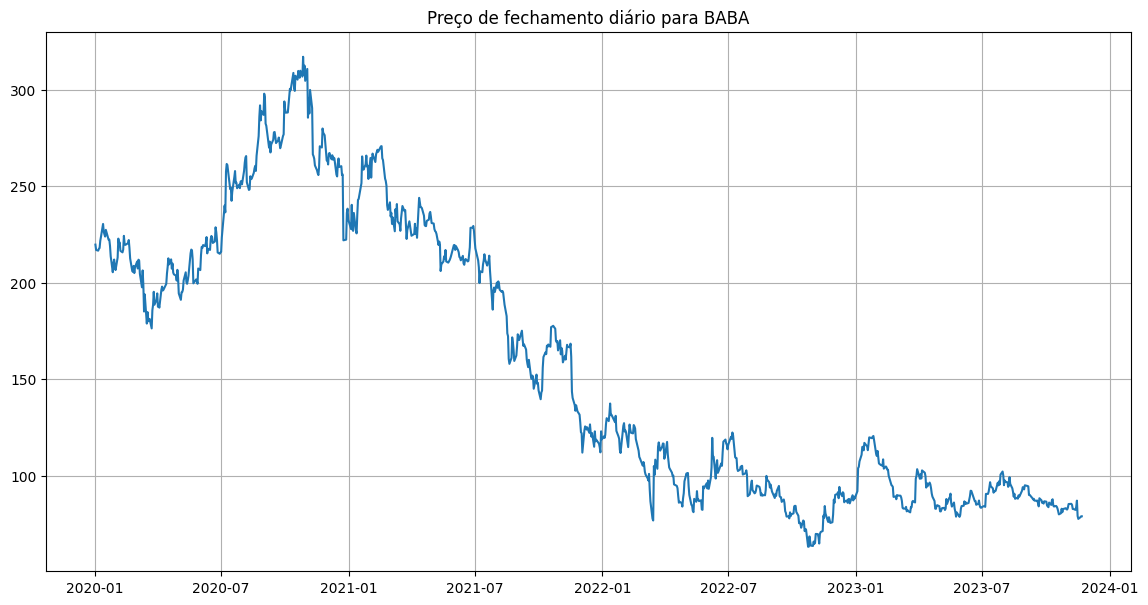

Epoch 1/5
655/655 - 3s - loss: 0.0635 - 3s/epoch - 5ms/step
Epoch 2/5
655/655 - 1s - loss: 0.0103 - 1s/epoch - 2ms/step
Epoch 3/5
655/655 - 3s - loss: 0.0020 - 3s/epoch - 4ms/step
Epoch 4/5
655/655 - 3s - loss: 5.5011e-04 - 3s/epoch - 4ms/step
Epoch 5/5
655/655 - 1s - loss: 5.1767e-04 - 1s/epoch - 2ms/step
Epoch 1/5
655/655 - 7s - loss: 0.0395 - 7s/epoch - 10ms/step
Epoch 2/5
655/655 - 2s - loss: 0.0023 - 2s/epoch - 3ms/step
Epoch 3/5
655/655 - 3s - loss: 5.6036e-04 - 3s/epoch - 4ms/step
Epoch 4/5
655/655 - 2s - loss: 5.4414e-04 - 2s/epoch - 2ms/step
Epoch 5/5
655/655 - 2s - loss: 5.7343e-04 - 2s/epoch - 2ms/step


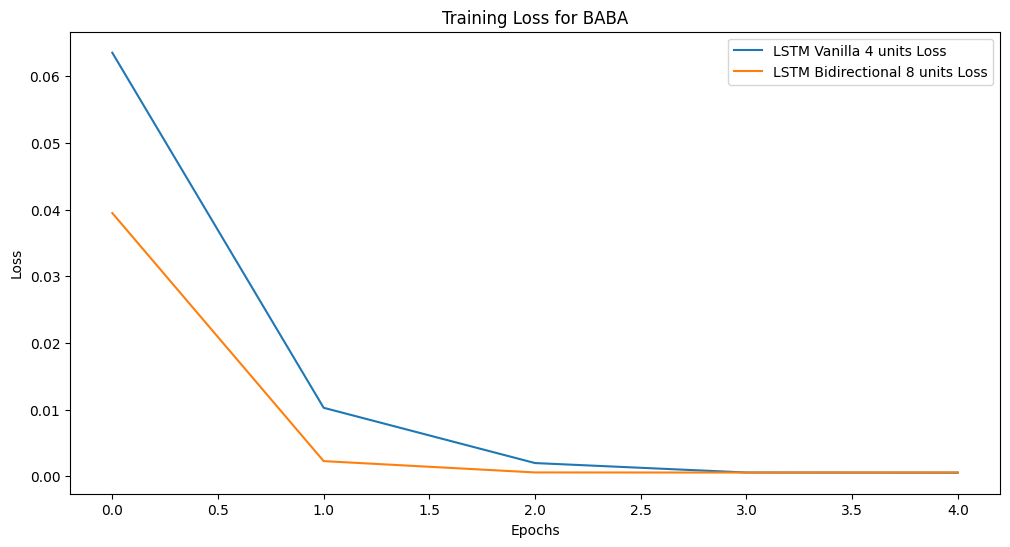

1/1 [==============================] - 0s 38ms/step
Processing GOLD
[*********************100%%**********************]  1 of 1 completed


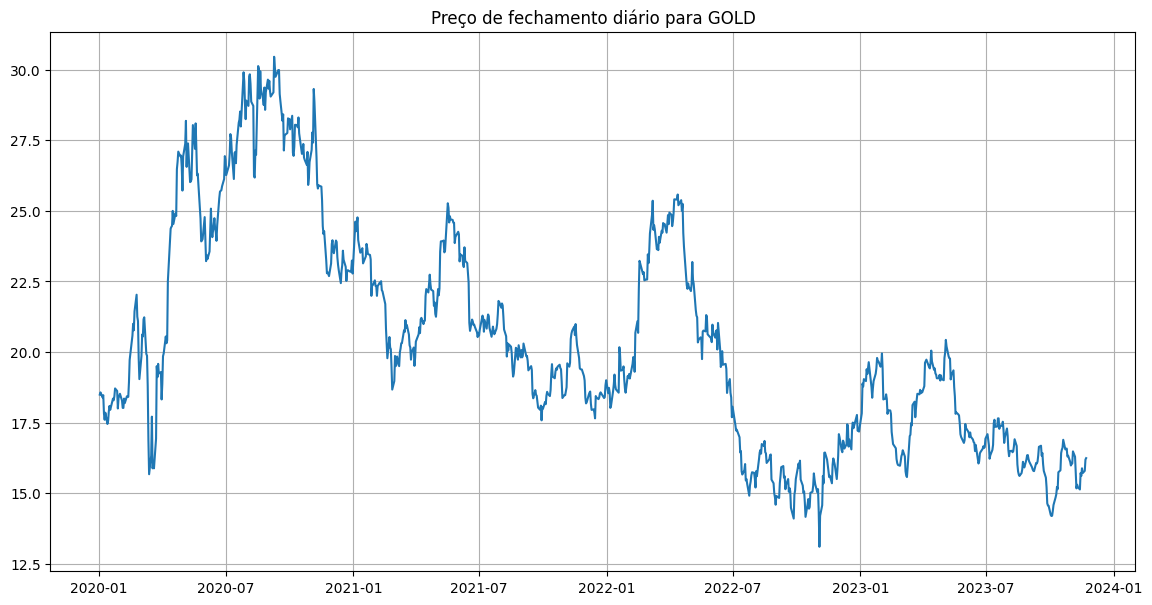

Epoch 1/5
655/655 - 4s - loss: 0.0732 - 4s/epoch - 6ms/step
Epoch 2/5
655/655 - 1s - loss: 0.0139 - 1s/epoch - 2ms/step
Epoch 3/5
655/655 - 1s - loss: 0.0044 - 1s/epoch - 2ms/step
Epoch 4/5
655/655 - 1s - loss: 0.0012 - 1s/epoch - 2ms/step
Epoch 5/5
655/655 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 1/5
655/655 - 6s - loss: 0.0398 - 6s/epoch - 8ms/step
Epoch 2/5
655/655 - 2s - loss: 0.0040 - 2s/epoch - 4ms/step
Epoch 3/5
655/655 - 2s - loss: 0.0013 - 2s/epoch - 3ms/step
Epoch 4/5
655/655 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 5/5
655/655 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step


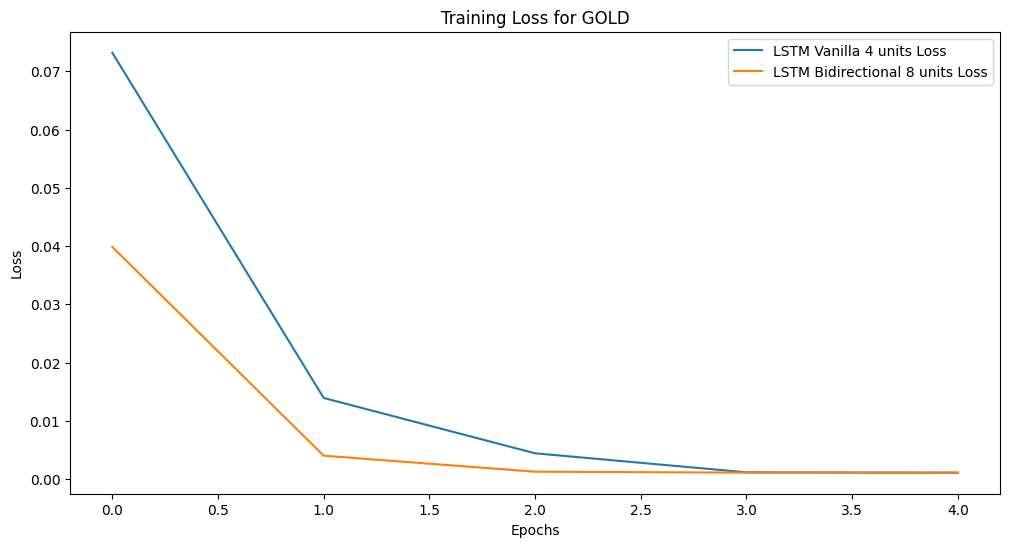

1/1 [==============================] - 0s 29ms/step
Processing PYPL
[*********************100%%**********************]  1 of 1 completed


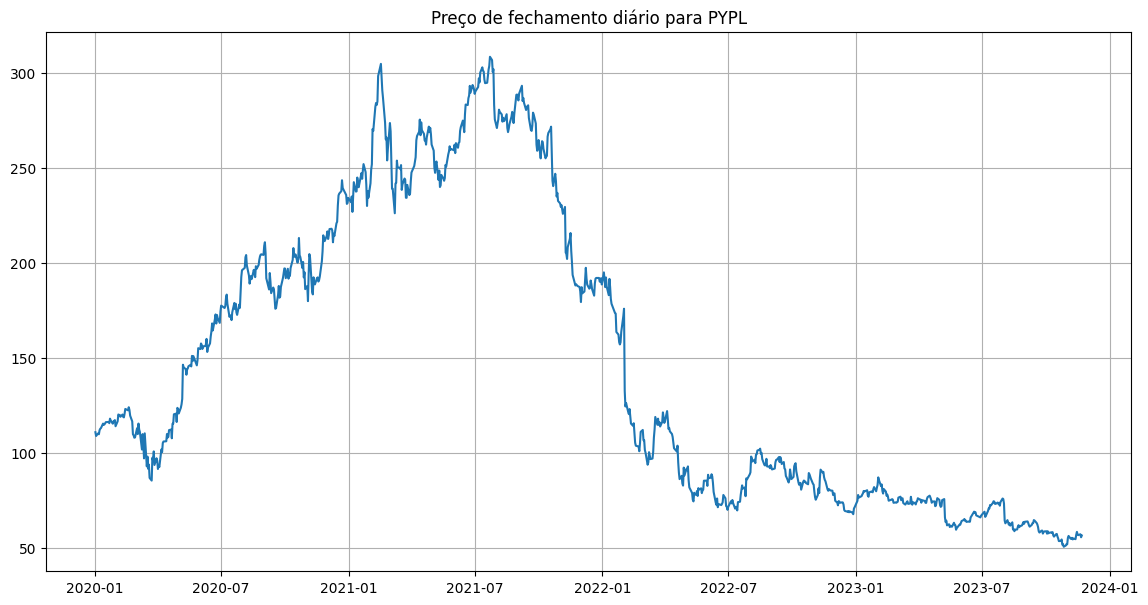

Epoch 1/5
655/655 - 3s - loss: 0.1589 - 3s/epoch - 5ms/step
Epoch 2/5
655/655 - 1s - loss: 0.0372 - 1s/epoch - 2ms/step
Epoch 3/5
655/655 - 1s - loss: 0.0125 - 1s/epoch - 2ms/step
Epoch 4/5
655/655 - 1s - loss: 0.0019 - 1s/epoch - 2ms/step
Epoch 5/5
655/655 - 1s - loss: 4.9428e-04 - 1s/epoch - 2ms/step
Epoch 1/5
655/655 - 6s - loss: 0.0664 - 6s/epoch - 8ms/step
Epoch 2/5
655/655 - 2s - loss: 0.0043 - 2s/epoch - 2ms/step
Epoch 3/5
655/655 - 2s - loss: 5.2698e-04 - 2s/epoch - 2ms/step
Epoch 4/5
655/655 - 2s - loss: 4.8200e-04 - 2s/epoch - 2ms/step
Epoch 5/5
655/655 - 2s - loss: 4.7164e-04 - 2s/epoch - 3ms/step


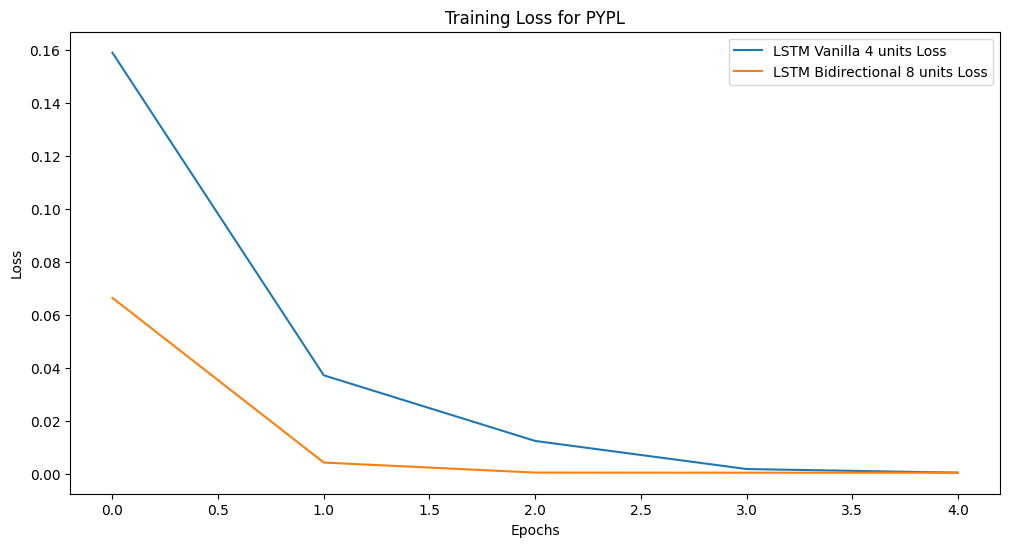

1/1 [==============================] - 0s 20ms/step
Model 1 -> LSTM Vanilla 4 units
Modal 2 -> LSTM Bidirectional 8 units
                                      RIOT      BABA      GOLD      PYPL
Model 1 Cumulative Sampling MSE   0.000168  0.000619  0.002093  0.000276
Model 1 Cumulative Sampling RMSE  0.012968  0.024874  0.045747  0.016602
Model 1 Sliding Window MSE        0.007171  0.009537  0.055702  0.002428
Model 1 Sliding Window RMSE       0.084681  0.097658  0.236012  0.049276
Model 2 Cumulative Sampling MSE   0.000062  0.000439  0.002040  0.000243
Model 2 Cumulative Sampling RMSE  0.007867  0.020947  0.045166  0.015590
Model 2 Sliding Window MSE        0.008368  0.033613  0.051416  0.019363
Model 2 Sliding Window RMSE       0.091477  0.183338  0.226751  0.139150


In [89]:
#
# Loop sobre os ativos
for asset in assets:
    print(f"Processing {asset}")

    # Baixar os dados do ativo
    data = yf.download(asset, start='2020-01-01', end='2023-12-31')

    # Plotar a série temporal
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'])
    plt.title(f'Preço de fechamento diário para {asset}')
    plt.grid(True)
    plt.show()

    # Normalizar os dados
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(data['Close'].values.reshape(-1,1))

    # Dividir os dados em treino e teste
    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # Reshape em X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # Reshape do input para ser [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    # Treinar dois modelos com diferentes números de unidades LSTM
    model1, history1 = train_model(trainX, trainY, look_back, units=4, epochs=5)
    model2, history2 = train_model(trainX, trainY, look_back, units=8, epochs=5, bidirectional=True)

    # Plotar a perda de treinamento para os dois modelos
    plt.figure(figsize=(12,6))
    plt.plot(history1.history['loss'], label='LSTM Vanilla 4 units Loss')
    plt.plot(history2.history['loss'], label='LSTM Bidirectional 8 units Loss')
    plt.title(f'Training Loss for {asset}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Calcular o MSE para os dois modelos
    trainPredict1 = model1.predict(trainX)
    trainPredict2 = model2.predict(trainX)
    testPredict1 = model1.predict(testX)
    testPredict2 = model2.predict(testX)

    # Inverter as previsões
    trainPredict1 = scaler.inverse_transform(trainPredict1)
    trainY1 = scaler.inverse_transform([trainY])
    testPredict1 = scaler.inverse_transform(testPredict1)
    testY1 = scaler.inverse_transform([testY])

    trainPredict2 = scaler.inverse_transform(trainPredict2)
    trainY2 = scaler.inverse_transform([trainY])
    testPredict2 = scaler.inverse_transform(testPredict2)
    testY2 = scaler.inverse_transform([testY])

    # Calcular o MSE
    trainScore1 = math.sqrt(mean_squared_error(trainY1[0], trainPredict1[:,0]))
    testScore1 = math.sqrt(mean_squared_error(testY1[0], testPredict1[:,0]))

    trainScore2 = math.sqrt(mean_squared_error(trainY2[0], trainPredict2[:,0]))
    testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))

    # Calcular o MSE e RMSE para o baseline
    baseline_mse, baseline_rmse = calculate_baseline_error(testY[1:], testY[:-1])

    # Número máximo de amostras para validação
    max_samples = 50

    # Implementar a abordagem de amostragem acumulativa
    cumulative_sampling_predictions1 = cumulative_sampling_approach(model1, testX, look_back, max_samples)
    cumulative_sampling_predictions2 = cumulative_sampling_approach(model2, testX, look_back, max_samples)

    # Implementar a abordagem de janela deslizante
    sliding_window_predictions1 = sliding_window_approach(model1, testX.copy(), look_back, max_samples)
    sliding_window_predictions2 = sliding_window_approach(model2, testX.copy(), look_back, max_samples)

    # Calcular o MSE e RMSE para cada abordagem
    cumulative_sampling_mse1, cumulative_sampling_rmse1 = calculate_baseline_error(testY[look_back:look_back+max_samples], cumulative_sampling_predictions1)
    cumulative_sampling_mse2, cumulative_sampling_rmse2 = calculate_baseline_error(testY[look_back:look_back+max_samples], cumulative_sampling_predictions2)
    sliding_window_mse1, sliding_window_rmse1 = calculate_baseline_error(testY[look_back:look_back+max_samples], sliding_window_predictions1)
    sliding_window_mse2, sliding_window_rmse2 = calculate_baseline_error(testY[look_back:look_back+max_samples], sliding_window_predictions2)

    # Armazenar os resultados no dicionário
    results[asset] = {
        'Model 1 Cumulative Sampling MSE': cumulative_sampling_mse1,
        'Model 1 Cumulative Sampling RMSE': cumulative_sampling_rmse1,
        'Model 1 Sliding Window MSE': sliding_window_mse1,
        'Model 1 Sliding Window RMSE': sliding_window_rmse1,
        'Model 2 Cumulative Sampling MSE': cumulative_sampling_mse2,
        'Model 2 Cumulative Sampling RMSE': cumulative_sampling_rmse2,
        'Model 2 Sliding Window MSE': sliding_window_mse2,
        'Model 2 Sliding Window RMSE': sliding_window_rmse2
    }

# Criar um DataFrame a partir do dicionário
results_df = pd.DataFrame(results)
print('Model 1 -> LSTM Vanilla 4 units')
print('Modal 2 -> LSTM Bidirectional 8 units')
print(results_df)
